In [22]:
import mlpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
url = 'https://datasets.mlpack.org/contact-tracing.csv'
data = pd.read_csv(url, header=None, names=['timestamp', 'latitude', 'longitude', 'id'])

data.head()

,timestamp,latitude,longitude,id
0,1593373946,12.880172,77.784798,Alice
1,1593377546,12.993111,77.596512,Alice
2,1593381146,12.975756,77.463615,Alice
3,1593384746,12.974606,77.615150,Alice
4,1593388346,12.997514,77.706261,Alice


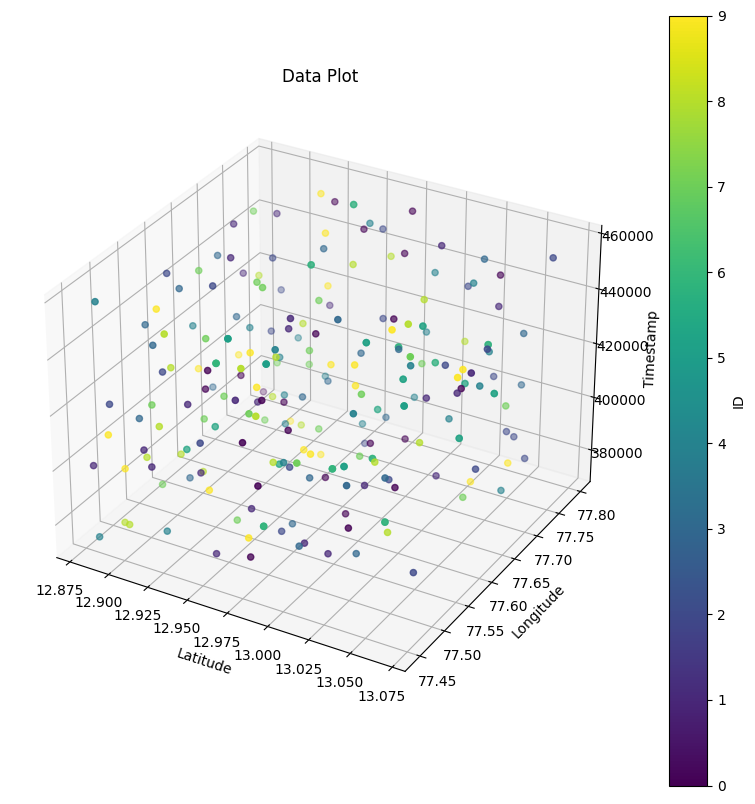

In [24]:
def plot_data(df, title='Data Plot'):
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')

    if not np.issubdtype(df['id'].dtype, np.number):
        df['id_cat'] = df['id'].astype('category').cat.codes
    else:
        df['id_cat'] = df['id']

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df['latitude'], df['longitude'], df['timestamp'], c=df['id_cat'], cmap='viridis')

    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Timestamp')
    ax.set_title(title)

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('ID')

    plt.show()

plot_data(data)


In [25]:
epsilon = 0.0018288  # 6 feet in kilometers
min_size = 2

output = mlpack.dbscan(input_=data[['latitude', 'longitude']].to_numpy(), epsilon=epsilon, min_size=min_size)

data['cluster'] = output['assignments']

num_clusters = len(np.unique(output['assignments'])) - (1 if -1 in output['assignments'] else 0)
print(f"Number of clusters: {num_clusters}")

Number of clusters: 29


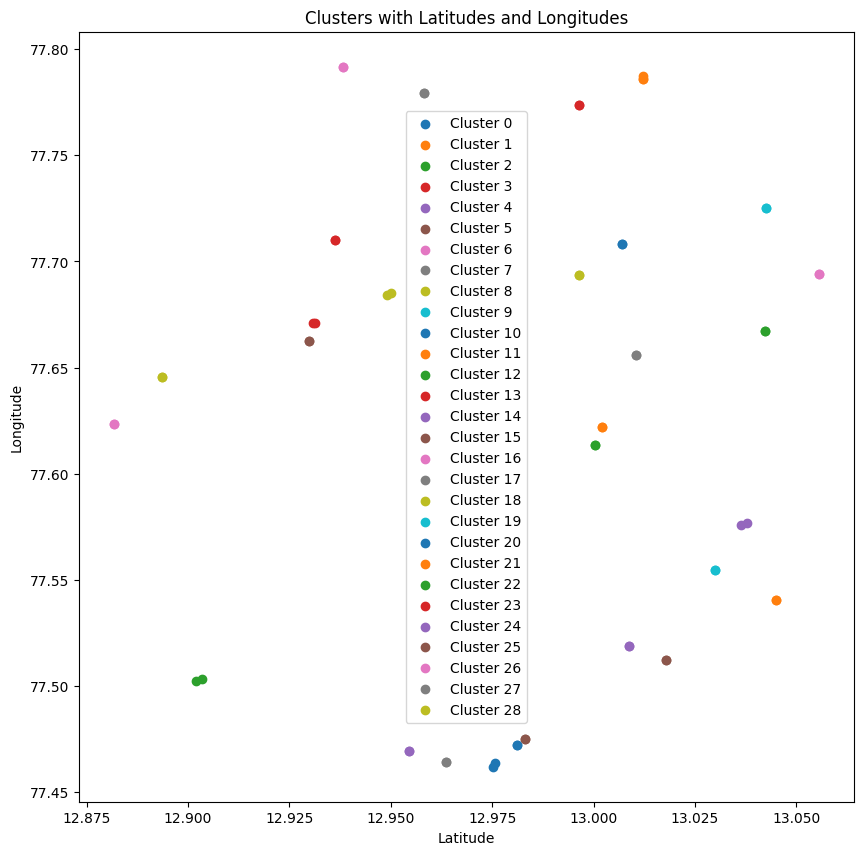

In [26]:
def plot_clusters(df):
    unique_clusters = df['cluster'].unique()
    plt.figure(figsize=(10, 10))

    for cluster in unique_clusters:
        if cluster != -1:
            cluster_data = df[df['cluster'] == cluster]
            plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster}')

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Clusters with Latitudes and Longitudes')
    plt.legend()
    plt.show()


plot_clusters(data)

In [27]:
def print_infected(df, infected_id):
    infected_cluster = df[df['id'] == infected_id]['cluster'].iloc[0]
    if infected_cluster != -1:
        potentially_infected = df[df['cluster'] == infected_cluster]['id'].unique()
        print(f"Infected: {infected_id}")
        print(f"Maybe infected others in the cluster: {', '.join([str(id) for id in potentially_infected if id != infected_id])}")
    else:
        print(f"No cluster found for infected id: {infected_id}")

# Example usage
print_infected(data, 'Heidi')

No cluster found for infected id: Heidi
